### Initialize Data

In [2]:
import torch
import torch.optim as optim
from focal_loss import FocalLoss
from mock_dataset import MockOutfitDataset
from outfit_model import OutfitCompatibilityModel
import torch.nn as nn

# Instantiate the mock dataset and dataloader
mock_dataset = MockOutfitDataset()
dataloader = torch.utils.data.DataLoader(mock_dataset, batch_size=50, shuffle=True)

### Visualize Data

Batch 1 - Shape of images: torch.Size([50, 3, 224, 224]), Texts: ('mock description 380', 'mock description 444', 'mock description 251', 'mock description 704', 'mock description 130', 'mock description 723', 'mock description 589', 'mock description 154', 'mock description 924', 'mock description 487', 'mock description 459', 'mock description 217', 'mock description 256', 'mock description 299', 'mock description 710', 'mock description 442', 'mock description 415', 'mock description 831', 'mock description 604', 'mock description 163', 'mock description 333', 'mock description 44', 'mock description 988', 'mock description 335', 'mock description 593', 'mock description 278', 'mock description 703', 'mock description 485', 'mock description 196', 'mock description 700', 'mock description 694', 'mock description 200', 'mock description 454', 'mock description 842', 'mock description 329', 'mock description 832', 'mock description 668', 'mock description 230', 'mock description 826',

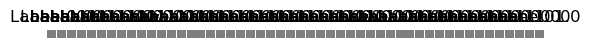

Batch 2 - Shape of images: torch.Size([50, 3, 224, 224]), Texts: ('mock description 366', 'mock description 14', 'mock description 540', 'mock description 728', 'mock description 416', 'mock description 965', 'mock description 45', 'mock description 910', 'mock description 27', 'mock description 171', 'mock description 770', 'mock description 210', 'mock description 776', 'mock description 449', 'mock description 351', 'mock description 822', 'mock description 445', 'mock description 960', 'mock description 310', 'mock description 18', 'mock description 614', 'mock description 43', 'mock description 572', 'mock description 799', 'mock description 208', 'mock description 553', 'mock description 919', 'mock description 669', 'mock description 79', 'mock description 601', 'mock description 756', 'mock description 246', 'mock description 302', 'mock description 771', 'mock description 100', 'mock description 783', 'mock description 264', 'mock description 161', 'mock description 211', 'moc

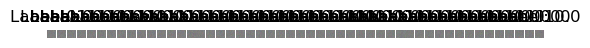

Batch 3 - Shape of images: torch.Size([50, 3, 224, 224]), Texts: ('mock description 168', 'mock description 152', 'mock description 93', 'mock description 904', 'mock description 40', 'mock description 205', 'mock description 191', 'mock description 507', 'mock description 632', 'mock description 236', 'mock description 994', 'mock description 684', 'mock description 804', 'mock description 576', 'mock description 26', 'mock description 187', 'mock description 16', 'mock description 433', 'mock description 802', 'mock description 833', 'mock description 169', 'mock description 990', 'mock description 607', 'mock description 602', 'mock description 21', 'mock description 521', 'mock description 471', 'mock description 271', 'mock description 789', 'mock description 777', 'mock description 482', 'mock description 261', 'mock description 672', 'mock description 609', 'mock description 468', 'mock description 660', 'mock description 53', 'mock description 241', 'mock description 160', 'moc

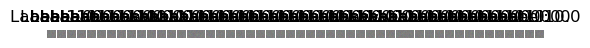

In [3]:
from matplotlib import pyplot as plt
import torchvision.transforms.functional as F


def show_images(images, labels):
    for i in range(images.size(0)):
        image = F.to_pil_image(images[i])
        plt.subplot(1, images.size(0), i + 1)
        plt.imshow(image)
        plt.title(f"Label: {labels[i]}")
        plt.axis("off")
    plt.show()


for batch_idx, (images, texts, labels) in enumerate(dataloader):
    print(
        f"Batch {batch_idx + 1} - Shape of images: {images.shape}, Texts: {texts}, Labels: {labels}"
    )

    # Visualize the images
    show_images(images, labels)
    
    if batch_idx == 2:  # Print information for the first 3 batches
        break

### Init Model

In [4]:
# Instantiate the model, dataset, and dataloader
model = OutfitCompatibilityModel()
focal_loss = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-5)

c:\Users\phamm\.conda\envs\outfit_recommendation\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\phamm\.conda\envs\outfit_recommendation\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
c:\Users\phamm\.conda\envs\outfit_recommendation\lib\site-packages\torch\nn\modules\transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_t

### Training

In [7]:
# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    for batch in dataloader:
        images, texts, labels = batch  # Adjust this based on your dataset structure
        # Convert texts to a list of strings
        # Ensure texts is a tuple with two elements
        texts = list(texts)

        optimizer.zero_grad()
        outputs = model(images, texts)
        loss = focal_loss(
            outputs, labels.unsqueeze(1)
        )  # Ensure labels have the right dimension
        loss.backward()
        optimizer.step()

        # Print or log the loss if needed
        print(f"Epoch {epoch + 1}, Batch loss: {loss.item()}")

    # Adjust the learning rate as needed (reduce by half in steps of 10)
    if (epoch + 1) % 10 == 0:
        for param_group in optimizer.param_groups:
            param_group["lr"] = param_group["lr"] / 2

RuntimeError: Tensors must have same number of dimensions: got 3 and 2